In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from os import environ
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 9,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "figure.dpi": 300,
    "lines.linewidth": 1.5,
    "savefig.dpi": 600,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

In [3]:
n_datasets=15

phi_values=[0.45,0.55,0.65,0.75,0.85,0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]

name_1='State_space_cte_pressure_T1418_st-quarter_phi_'
name_2='Reaction_rates_cte_pressure_T1418_st-quarter_phi_'

end='.csv'

In [4]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

/var/folders/7l/rwhyc72d0nq7r3crs22x25l00000gq/T/ipykernel_46115/2652808745.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/7l/rwhyc72d0nq7r3crs22x25l00000gq/T/ipykernel_46115/2652808745.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  IDT_vector[i]=dataset_IDT
/var/folders/7l/rwhyc72d0nq7r3crs22x25l00000gq/T/ipykernel_46115/2652808745.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/7l/rwhyc72d0nq7r3crs22x25l00000gq/T/ipykernel_46115/2652808745.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

[0.00012204 0.0001245  0.00012783 0.00013179 0.00013621 0.00014101
 0.00014614 0.00015156 0.00015724 0.00016317 0.00016933 0.00017571
 0.00018231 0.00018912 0.00019613]


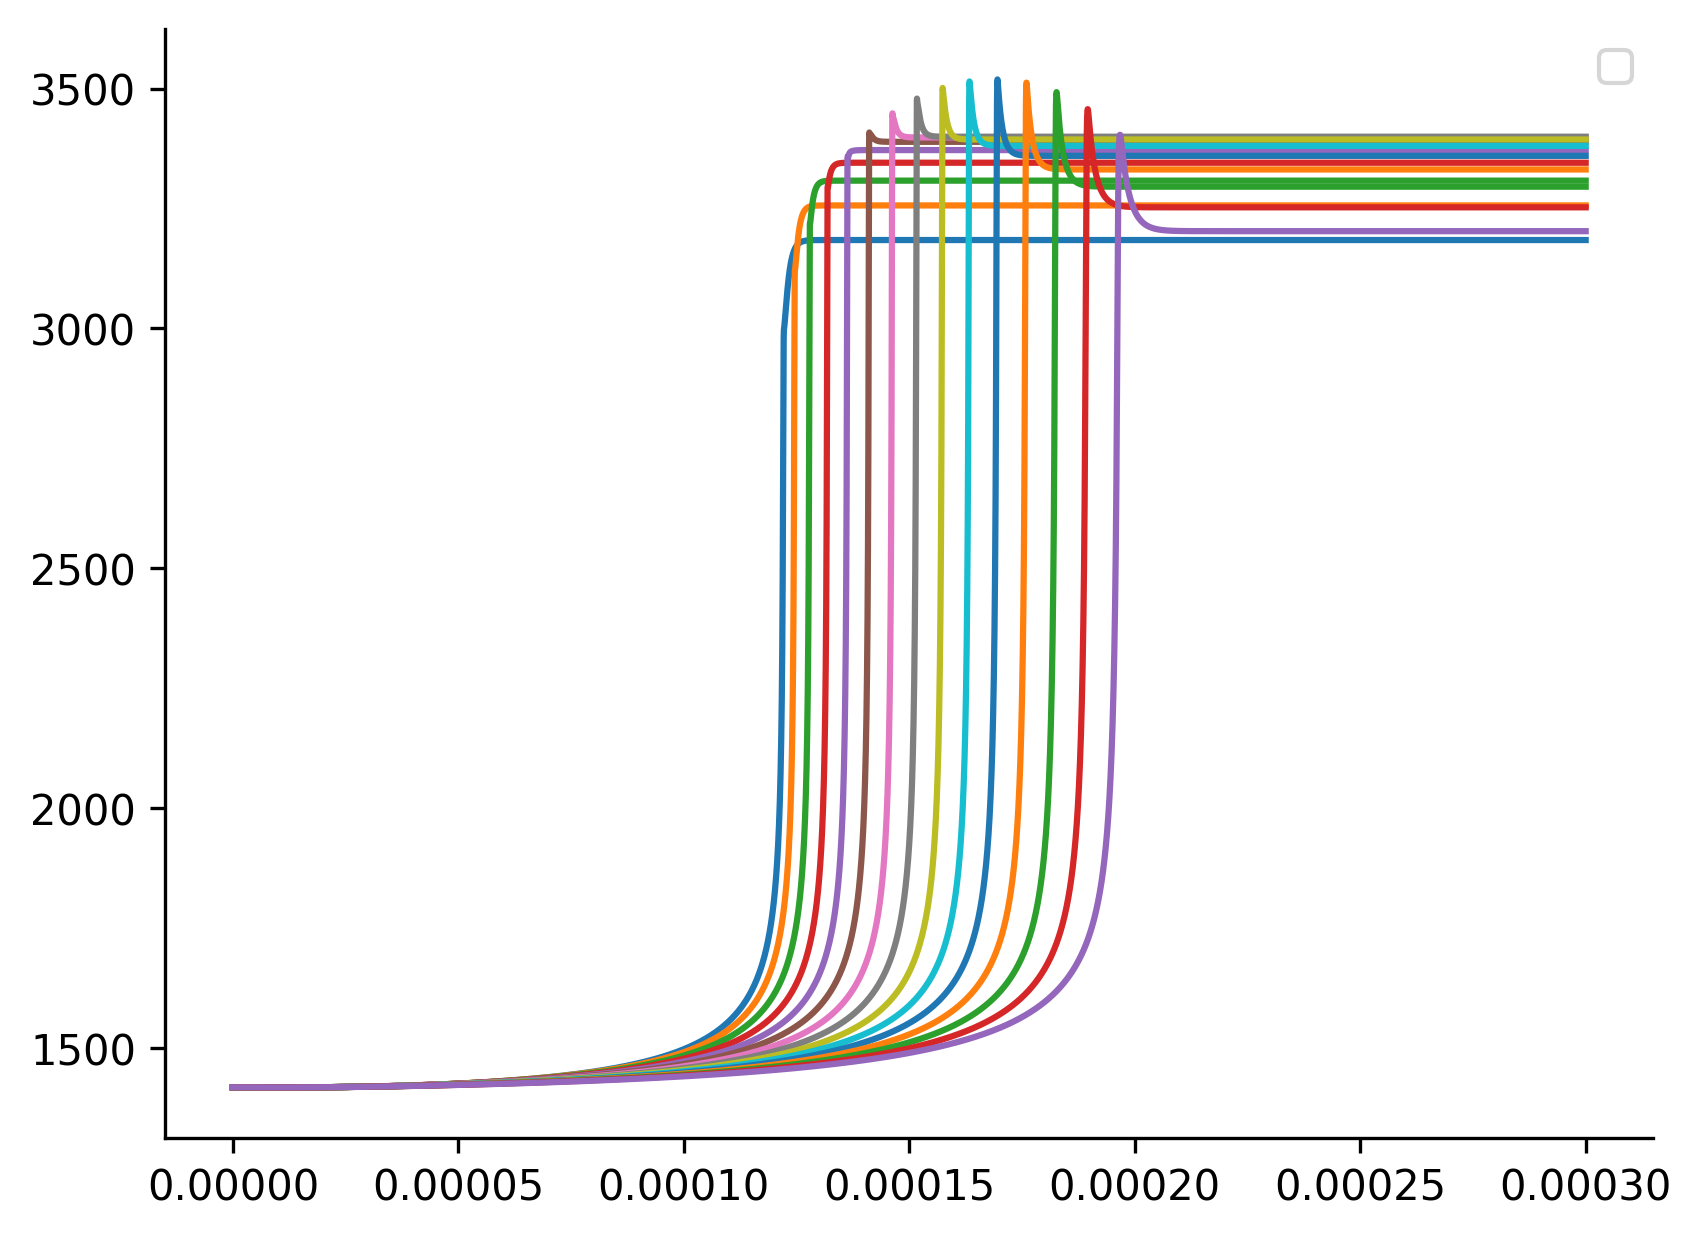

In [5]:
IDT_vector=np.zeros(n_datasets)

for i in range(n_datasets):
    cantera_species=pd.read_csv(join(home, folder1,folder2,name_1+str(i)+end))
    cantera_species=pd.DataFrame(cantera_species)
        
    Temperature=cantera_species.loc[:,'T[K]']
    time=cantera_species.loc[:,'t[s]']
    
    plt.plot(time, cantera_species.loc[:,'T[K]'])
    plt.legend()
    
    IDT=np.gradient(Temperature.to_numpy(),time.to_numpy())

    max_IDT=np.amax(IDT)
        
    index_IDT=np.where(IDT==max_IDT)
        
    dataset_IDT=time.iloc[index_IDT]
    
    IDT_vector[i]=dataset_IDT
print(IDT_vector)

In [6]:
from sklearn.cluster import KMeans

X=np.reshape(IDT_vector,(-1,1))

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

In [8]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
DB_score=davies_bouldin_score(X,kmeans.labels_)
print('DB score', DB_score)

DB score 0.4801152353832036


In [10]:
CH_score=calinski_harabasz_score(X,kmeans.labels_)
print('CH_score', CH_score)

CH_score 41.28735988196323


In [11]:
SH_score=silhouette_score(X, kmeans.fit_predict(X))
print('Silhouette score', SH_score)

Silhouette score 0.5925622061169069


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
DB_score=davies_bouldin_score(X,kmeans.labels_)
print('DB score', DB_score)

DB score 0.48000544690488595


In [14]:
CH_score=calinski_harabasz_score(X,kmeans.labels_)
print('CH_score', CH_score)

CH_score 49.81372413418144


In [15]:
SH_score=silhouette_score(X, kmeans.fit_predict(X))
print('Silhouette score', SH_score)

Silhouette score 0.5189909903535916


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1], dtype=int32)

In [17]:
DB_score=davies_bouldin_score(X,kmeans.labels_)
print('DB score', DB_score)

DB score 0.48932724291504404


In [18]:
CH_score=calinski_harabasz_score(X,kmeans.labels_)
print('CH_score', CH_score)

CH_score 60.58452571792556


In [19]:
SH_score=silhouette_score(X, kmeans.fit_predict(X))
print('Silhouette score', SH_score)

Silhouette score 0.4742936808709765


In [20]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 4], dtype=int32)

In [21]:
DB_score=davies_bouldin_score(X,kmeans.labels_)
print('DB score', DB_score)

DB score 0.46111352246907755


In [22]:
CH_score=calinski_harabasz_score(X,kmeans.labels_)
print('CH_score', CH_score)

CH_score 49.287142062909076


In [23]:
SH_score=silhouette_score(X, kmeans.fit_predict(X))
print('Silhouette score', SH_score)

Silhouette score 0.372780271524953


In [24]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 5, 5, 5, 3, 3, 3, 1, 1, 4], dtype=int32)

In [25]:
DB_score=davies_bouldin_score(X,kmeans.labels_)
print('DB score', DB_score)

DB score 0.4450481730848808


In [26]:
CH_score=calinski_harabasz_score(X,kmeans.labels_)
print('CH_score', CH_score)

CH_score 63.02917623904654


In [27]:
SH_score=silhouette_score(X, kmeans.fit_predict(X))
print('Silhouette score', SH_score)

Silhouette score 0.3404428103608122


In [28]:
#two clusters scattering
phi0=phi_values[0:9]
K0=IDT_vector[0:9]*1e3

phi1=phi_values[9:]
K1=IDT_vector[9:]*1e3

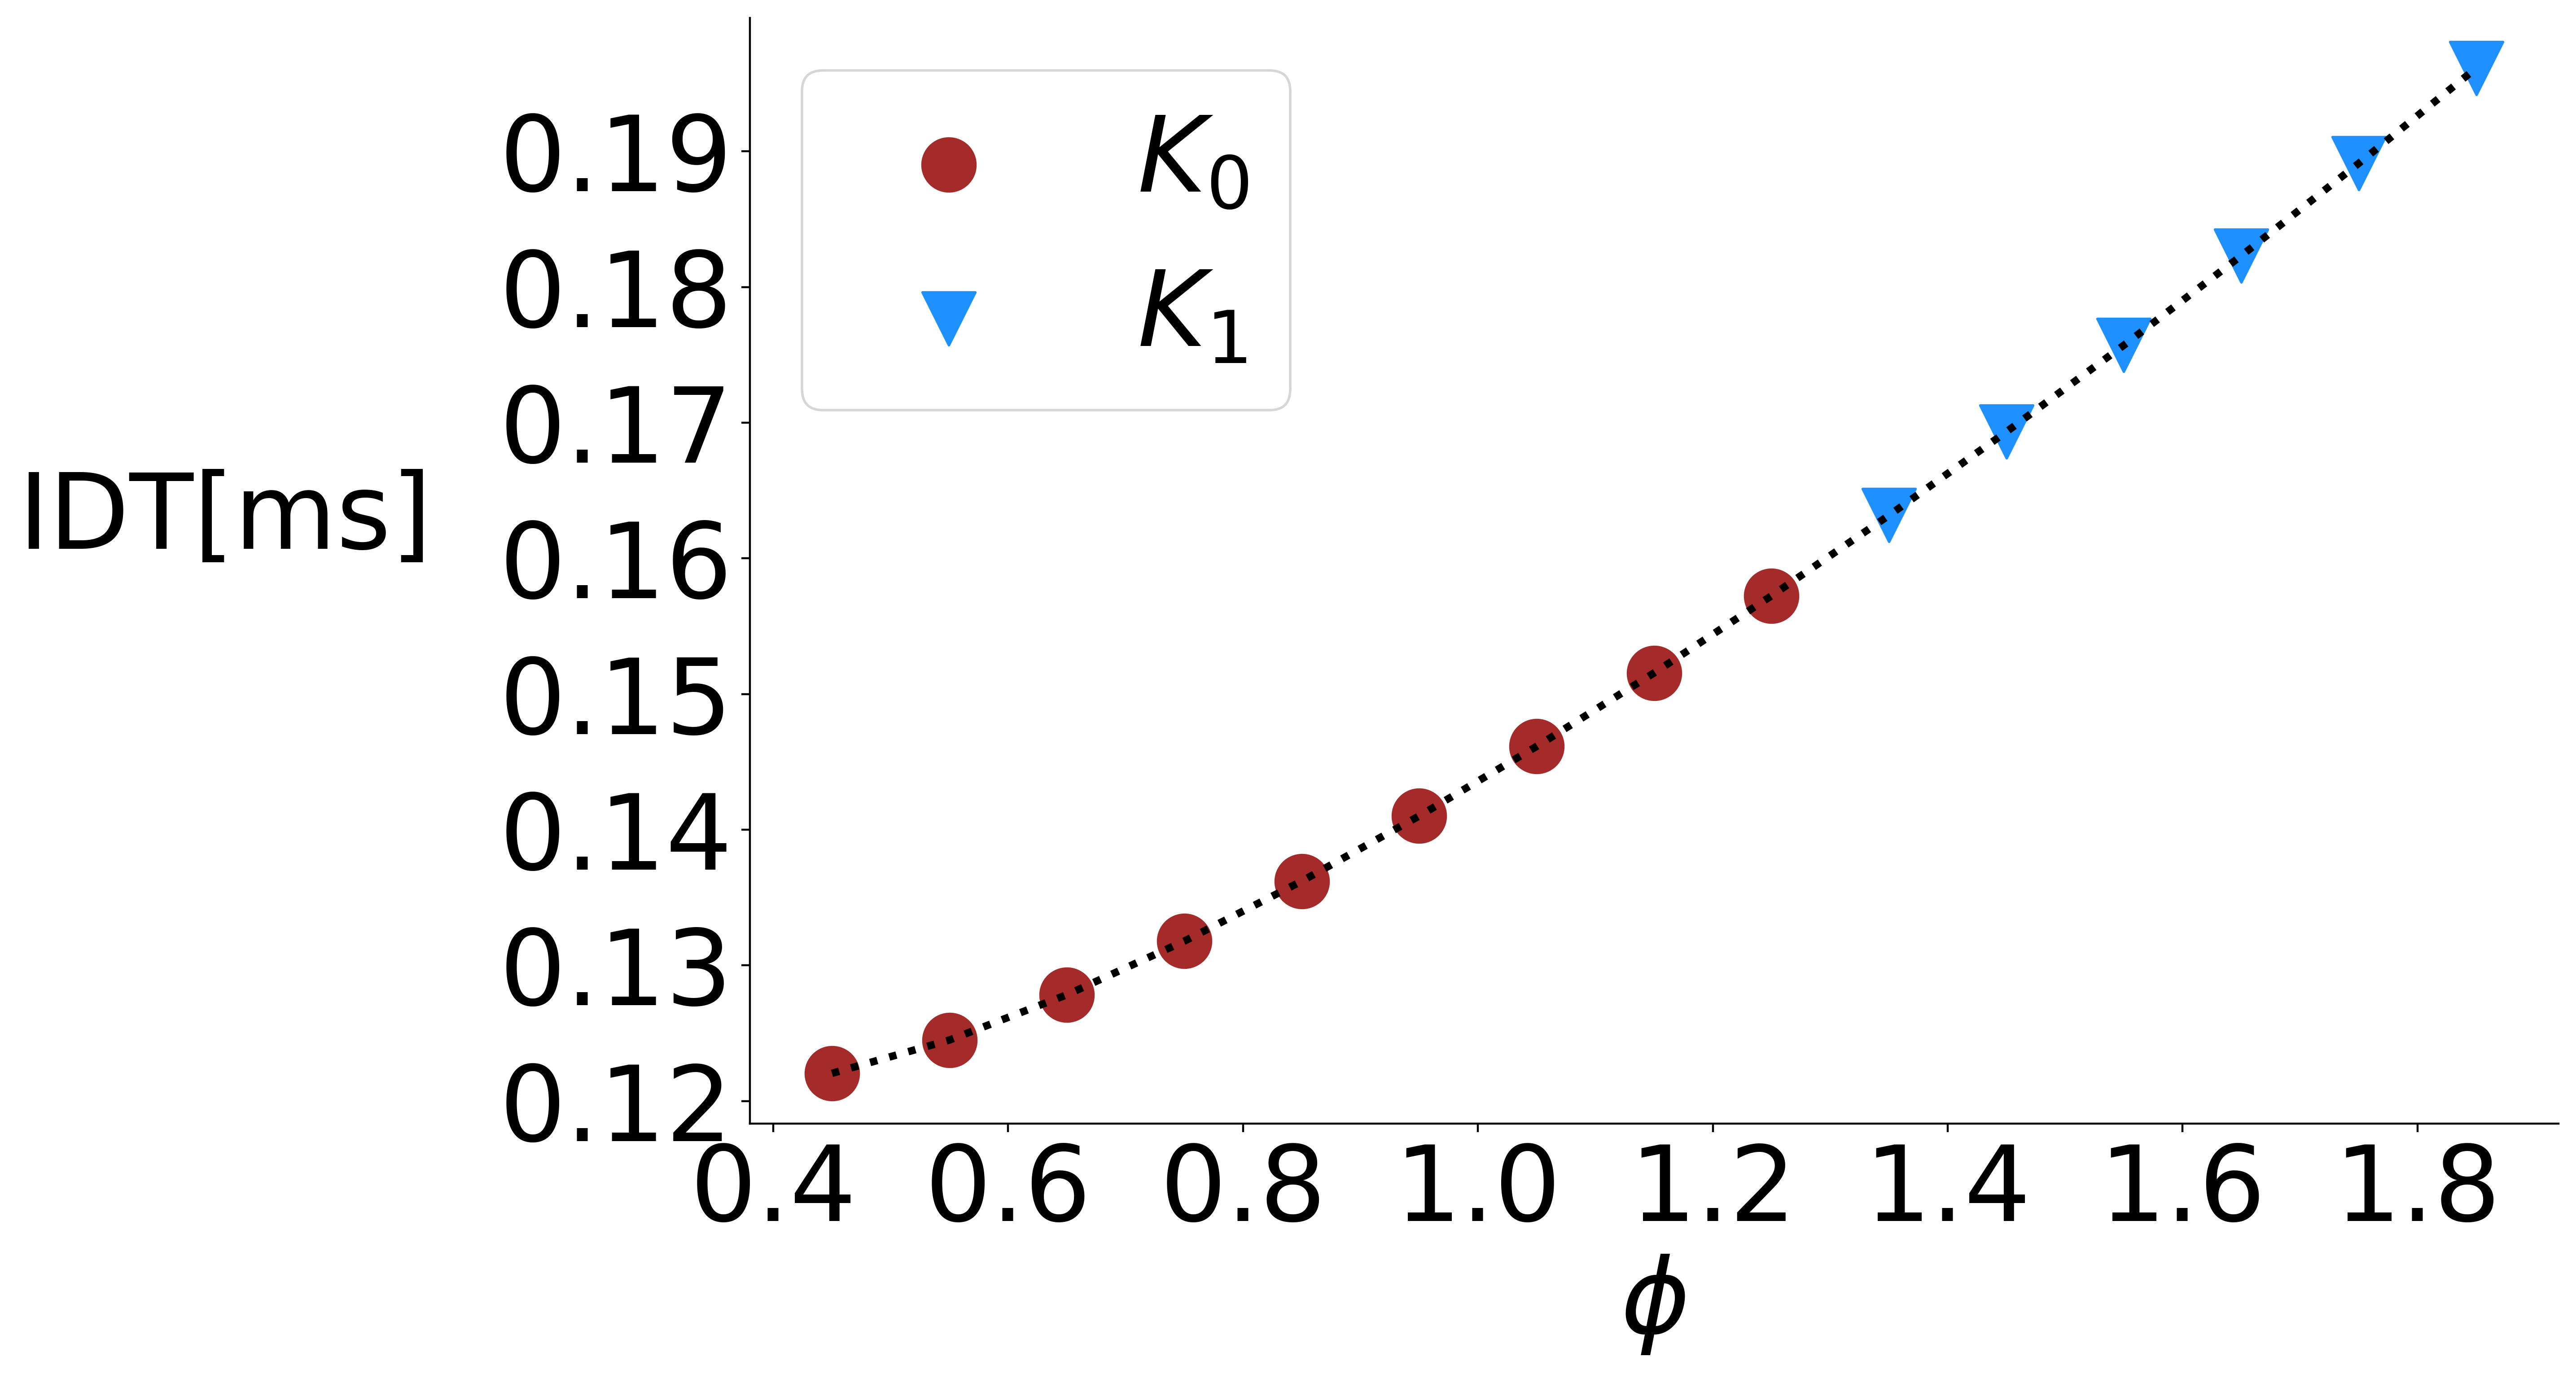

In [30]:
plt.figure(figsize=(13,8), dpi=400)
plt.plot(phi_values,IDT_vector*1e3, linewidth=3, color='k',linestyle='dotted')
plt.scatter(phi0,K0,color='brown', s=450, label=r'$K_{0}$')
plt.scatter(phi1,K1,color='dodgerblue', s=450, label=r'$K_{1}$', marker='v')
plt.yticks(fontsize=42)
plt.xticks(fontsize=42)
plt.xlabel(r'$\phi$',fontsize=42)
plt.ylabel('IDT[ms]',fontsize=42, loc='center',rotation='horizontal', labelpad=110)
plt.legend(loc='best', fontsize=42)
#plt.savefig('Other_species-clusterb_test.jpg',dpi=400,bbox_inches='tight')
plt.savefig('IDT_cluster_K2.png', dpi=600,bbox_inches='tight')

In [31]:
#three clusters scattering
phi0=phi_values[0:5]
K0=IDT_vector[0:5]*1e3

phi1=phi_values[5:10]
K1=IDT_vector[5:10]*1e3

phi2=phi_values[10:]
K2=IDT_vector[10:]*1e3

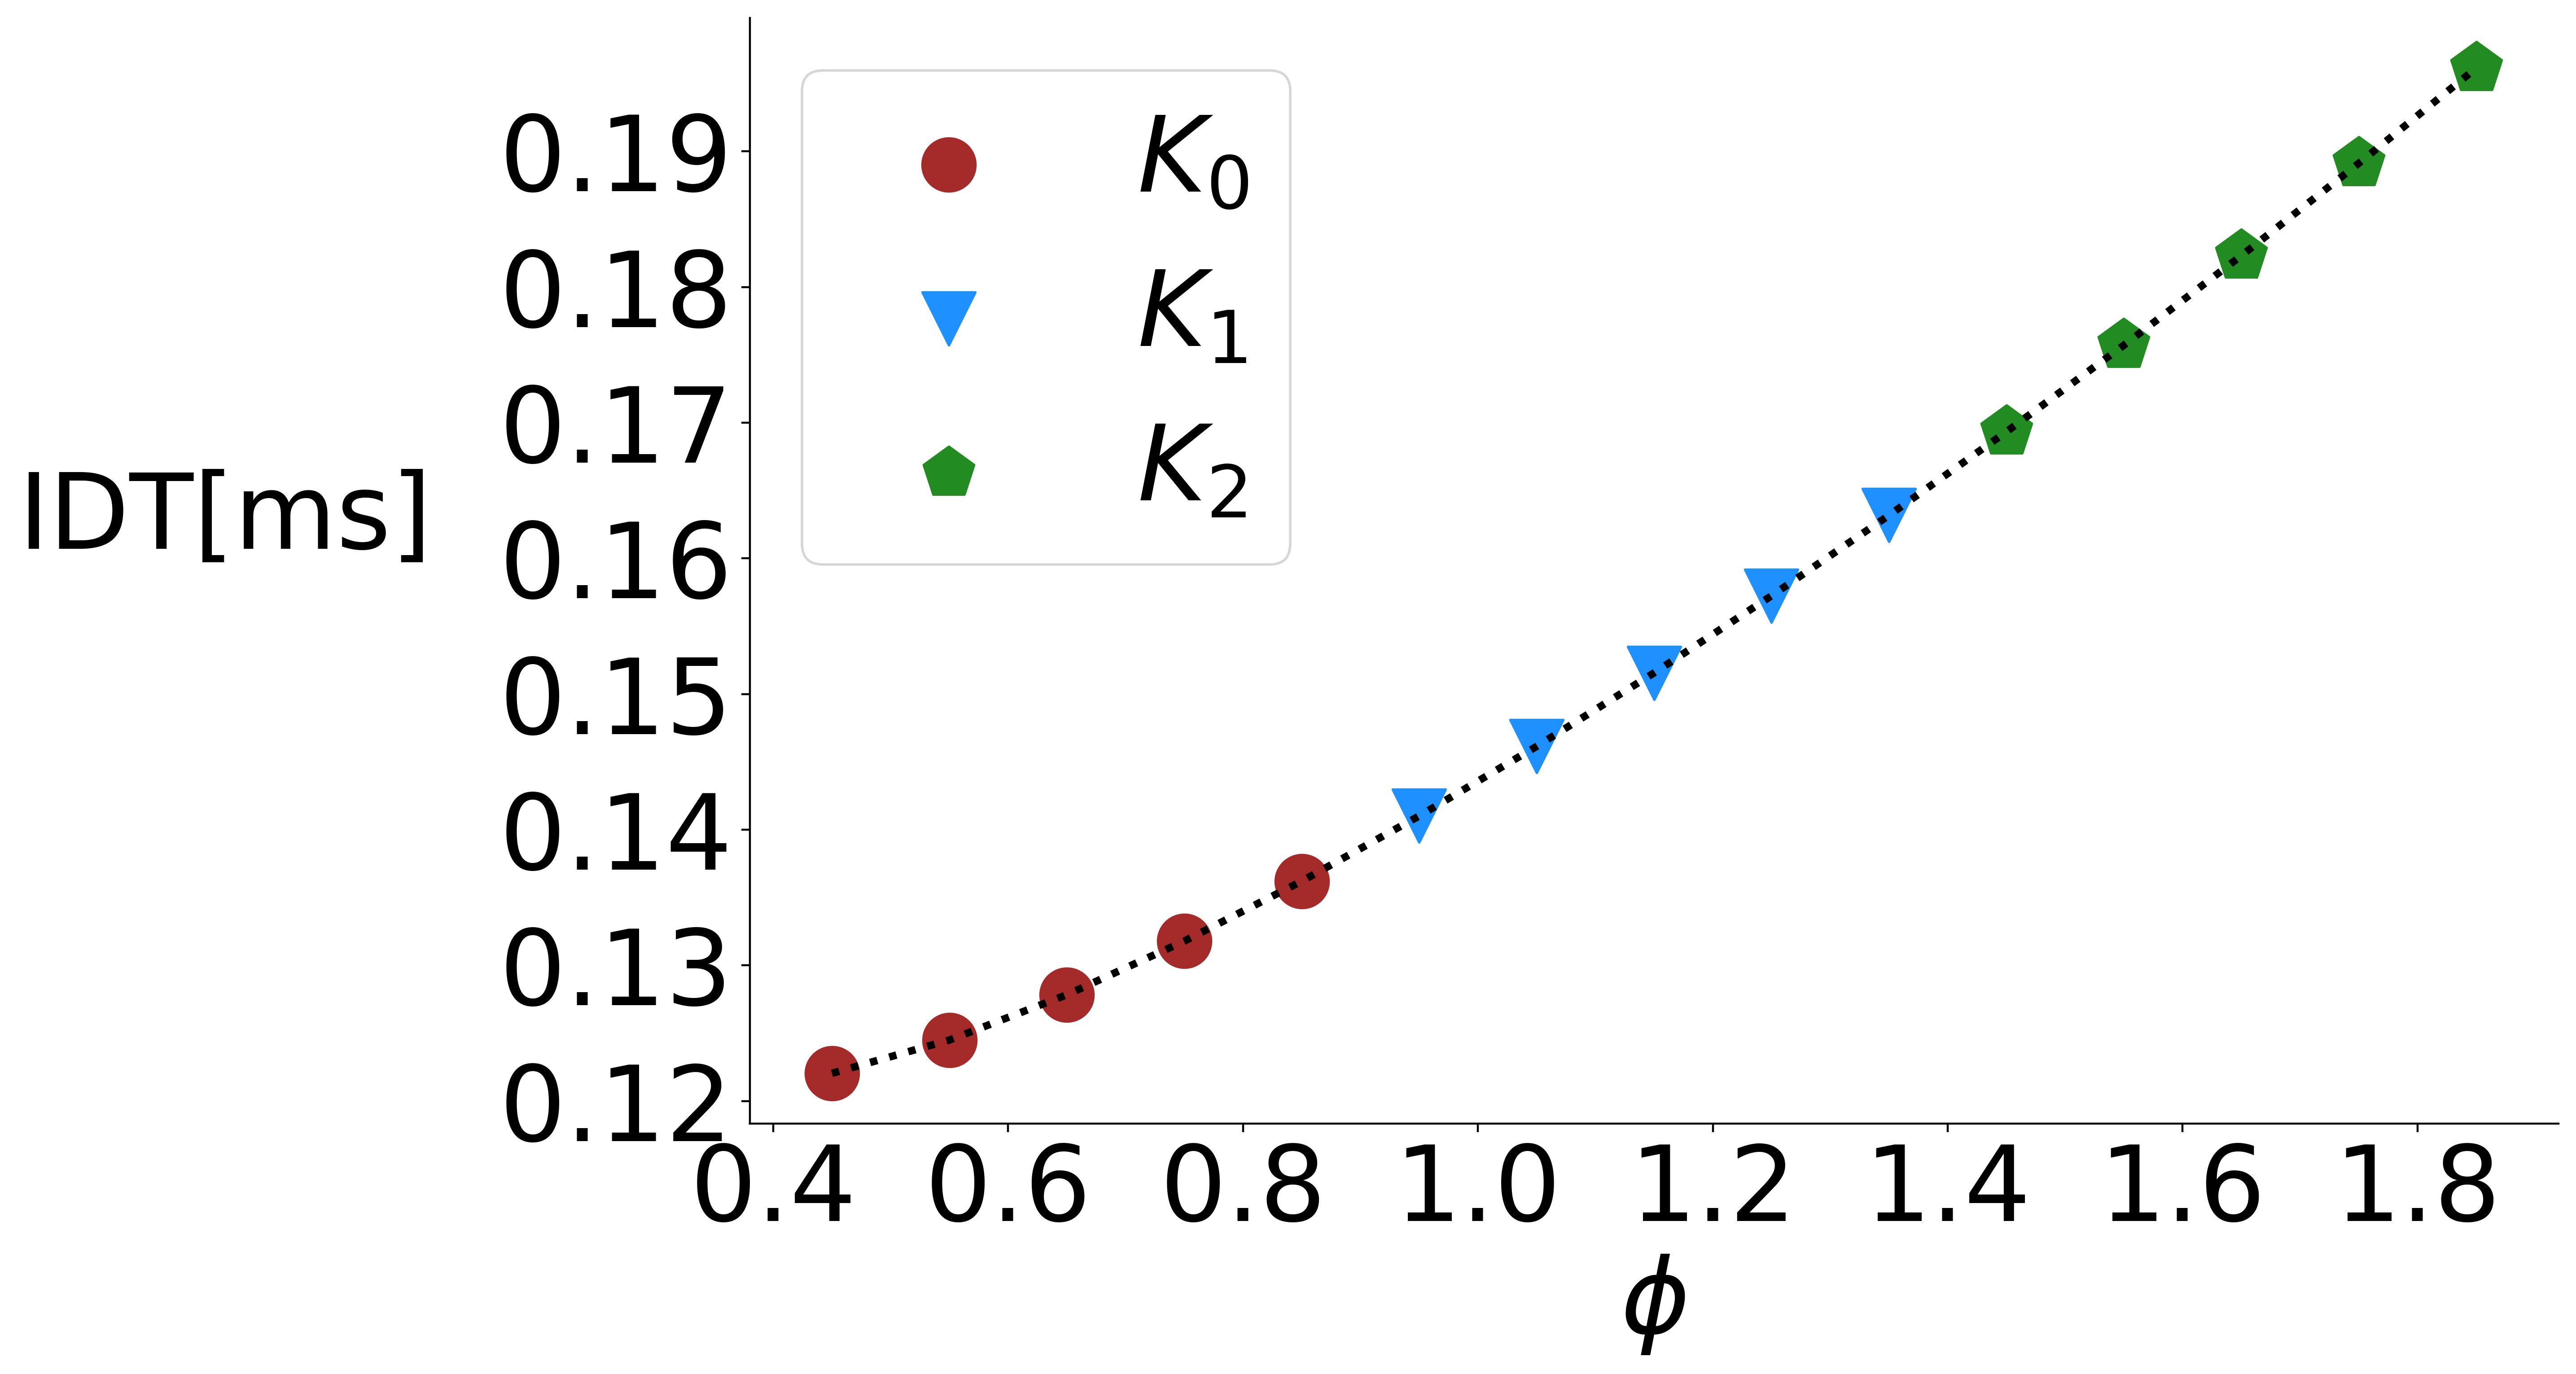

In [32]:
plt.figure(figsize=(13,8), dpi=400)
plt.plot(phi_values,IDT_vector*1e3, linewidth=3, color='k',linestyle='dotted')
plt.scatter(phi0,K0,color='brown', s=450, label=r'$K_{0}$')
plt.scatter(phi1,K1,color='dodgerblue', s=450, label=r'$K_{1}$', marker='v')
plt.scatter(phi2,K2,color='forestgreen', s=450, label=r'$K_{2}$', marker='p')
plt.yticks(fontsize=42)
plt.xticks(fontsize=42)
plt.xlabel(r'$\phi$',fontsize=42)
plt.ylabel('IDT[ms]',fontsize=42, loc='center',rotation='horizontal', labelpad=110)
plt.legend(loc='best', fontsize=42)
#plt.savefig('Other_species-clusterb_test.jpg',dpi=400,bbox_inches='tight')
plt.savefig('IDT_cluster_K3.png', dpi=600,bbox_inches='tight')

In [33]:
#four clusters scattering
phi0=phi_values[0:4]
K0=IDT_vector[0:4]*1e3

phi1=phi_values[4:8]
K1=IDT_vector[4:8]*1e3

phi2=phi_values[8:12]
K2=IDT_vector[8:12]*1e3

phi3=phi_values[12:]
K3=IDT_vector[12:]*1e3

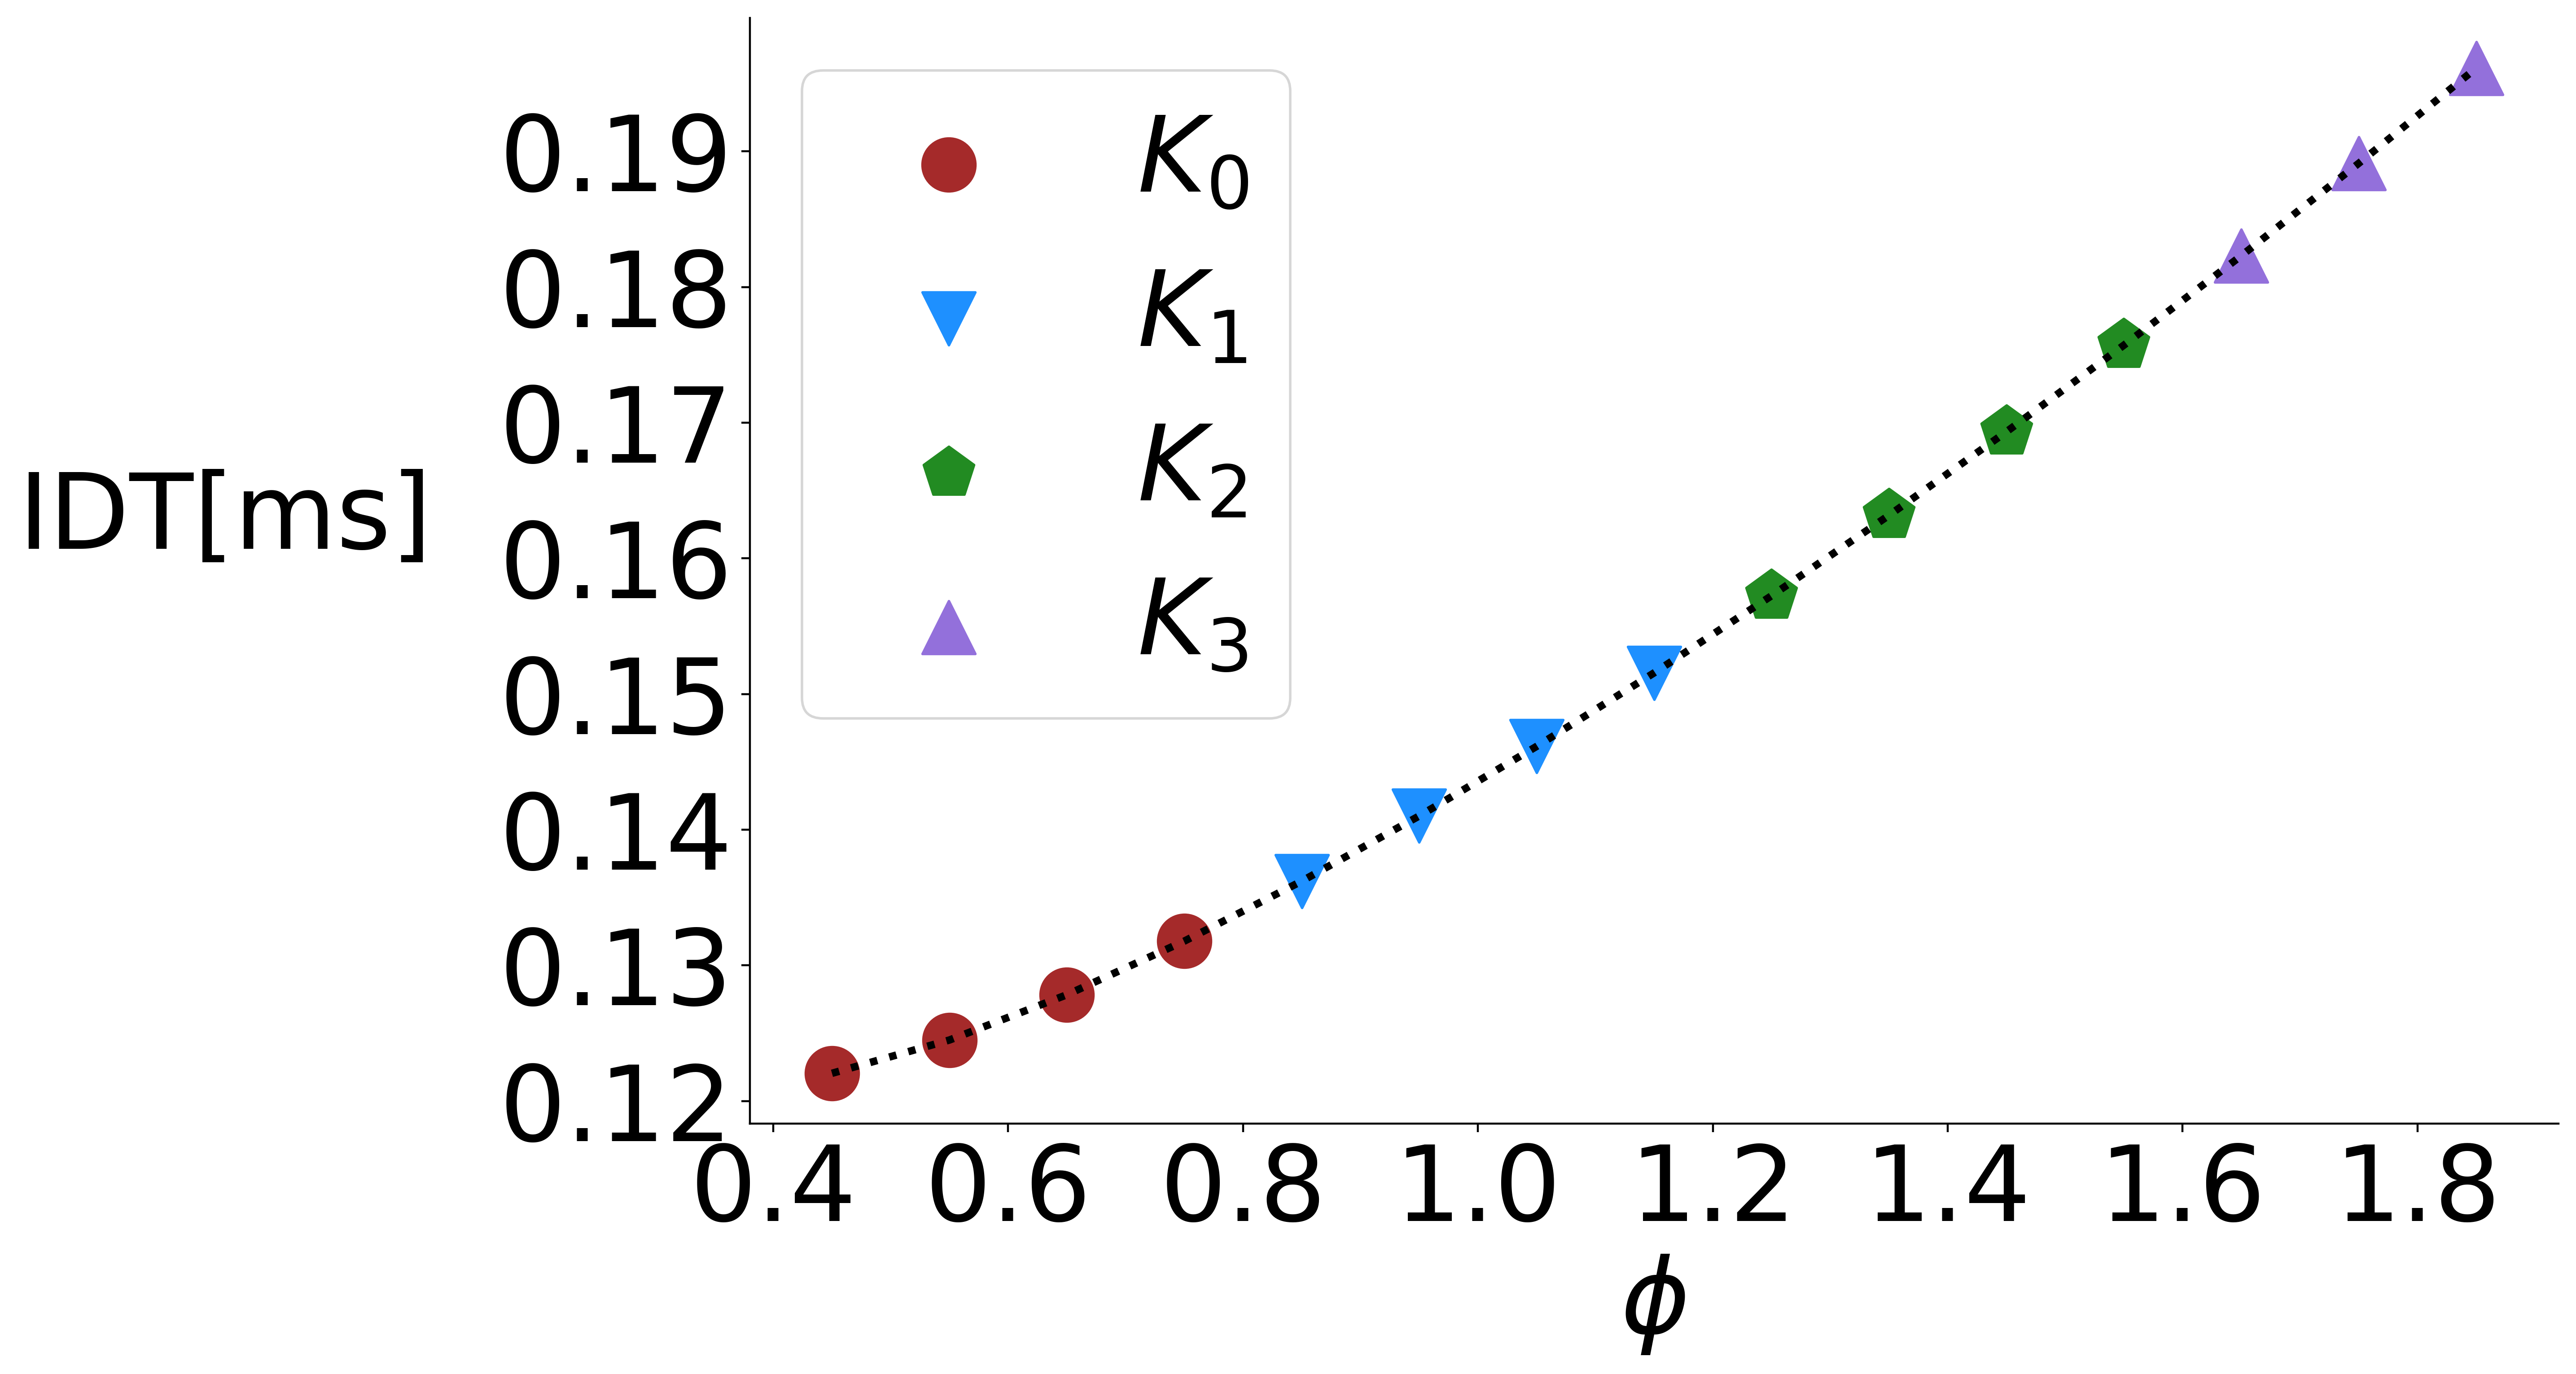

In [34]:
plt.figure(figsize=(13,8), dpi=400)
plt.plot(phi_values,IDT_vector*1e3, linewidth=3, color='k',linestyle='dotted')
plt.scatter(phi0,K0,color='brown', s=450, label=r'$K_{0}$')
plt.scatter(phi1,K1,color='dodgerblue', s=450, label=r'$K_{1}$', marker='v')
plt.scatter(phi2,K2,color='forestgreen', s=450, label=r'$K_{2}$', marker='p')
plt.scatter(phi3,K3,color='mediumpurple', s=450, label=r'$K_{3}$', marker='^')
plt.yticks(fontsize=42)
plt.xticks(fontsize=42)
plt.xlabel(r'$\phi$',fontsize=42)
plt.ylabel('IDT[ms]',fontsize=42, loc='center',rotation='horizontal', labelpad=110)
plt.legend(loc='best', fontsize=42)
#plt.savefig('Other_species-clusterb_test.jpg',dpi=400,bbox_inches='tight')
plt.savefig('IDT_cluster_K4.png', dpi=600,bbox_inches='tight')